In [96]:
#Importing libraries and dataset

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import math
sns.set_theme()

In [97]:
police_deaths_df = pd.read_csv('police_deaths_in_america.csv')
display(police_deaths_df.head())

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State,K9_Unit
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York,0
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York,0
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York,0
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States,0
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York,0


In [98]:
police_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            26269 non-null  object
 1   Name            26269 non-null  object
 2   Cause_of_Death  26269 non-null  object
 3   Date            26269 non-null  object
 4   Year            26269 non-null  int64 
 5   Month           26269 non-null  object
 6   Day             26269 non-null  object
 7   Department      26269 non-null  object
 8   State           26269 non-null  object
 9   K9_Unit         26269 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [99]:
#Separate Human Police X K9(dogs) 

human_police_deaths_df = police_deaths_df[police_deaths_df["K9_Unit"]==0].reset_index(drop=True)

human_police_deaths_df.drop("K9_Unit",axis=1,inplace=True)

human_police_deaths_df

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York
...,...,...,...,...,...,...,...,...,...
25781,Supervisory Police Officer,"Yiu Tak ""Louis"" Tao",9/11 related illness,"Tuesday, May 17, 2022",2022,May,Tuesday,United States Department of Justice - Federal ...,United States
25782,Senior Correctional Police Officer,Daniel Sincavage,Automobile crash,"Thursday, May 19, 2022",2022,May,Thursday,"New Jersey Department of Corrections, NJ",New Jersey
25783,Officer Trainee,Cody Alan Olafson,Duty related illness,"Friday, May 20, 2022",2022,May,Friday,United States Department of Homeland Security ...,United States
25784,Police Officer,Houston Tipping,Training accident,"Sunday, May 29, 2022",2022,May,Sunday,"Los Angeles Police Department, CA",California


In [100]:
l = ['Name','Cause_of_Death','Date','Month','Day','Department','State']

death_count_by_year_df = human_police_deaths_df.groupby(by="Year").count().drop(l,axis=1)
death_count_by_year_df = death_count_by_year_df.rename(columns={'Rank':'Count'})

death_count_by_year_df

,Count
Year,
1791,2
1792,1
1794,1
1797,2
1798,1
...,...
2018,188
2019,158
2020,414


In [101]:
death_count_by_year_df.describe().round(0)

,Count
count,210.0
mean,123.0
std,101.0
min,1.0
25%,20.0
50%,130.0
75%,185.0
max,622.0


In [102]:
death_count_by_year_df.sort_values(by=['Count'],ascending=False).head(10)

,Count
Year,
2021,622
2020,414
1930,347
1927,335
1932,327
1929,320
1931,318
1921,316
1922,311


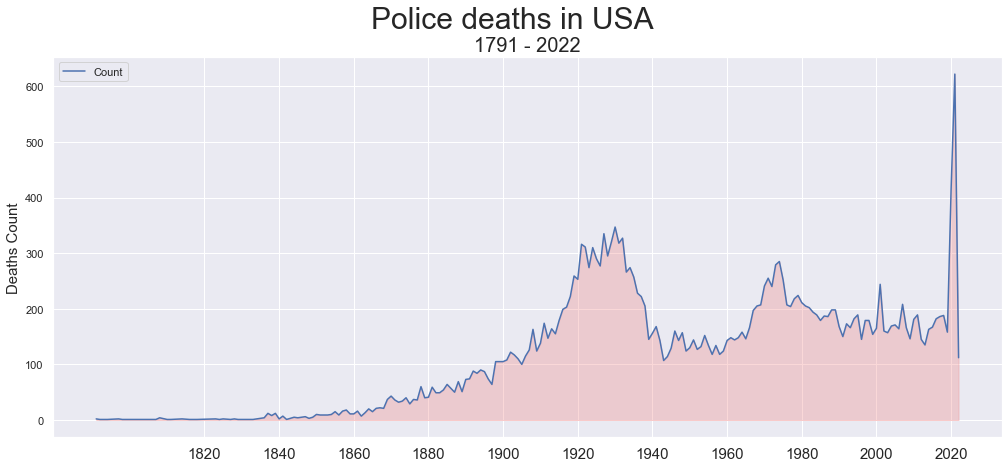

In [103]:
plt.figure(figsize=(17,7))

plot_1 = sns.lineplot(data=death_count_by_year_df)

plt.suptitle("Police deaths in USA",fontsize=30)
plt.title("1791 - 2022",fontsize=20)


plt.xlabel("",fontsize=25)
plt.ylabel("Deaths Count",fontsize=15)

plt.xticks(fontsize=20)
plt.xticks(range(1820,2022,20), fontsize = 15)
plt.fill_between(death_count_by_year_df.index,death_count_by_year_df["Count"], color='lightcoral', alpha=.3)
plt.show()

In [104]:
deaths_20_21_df = human_police_deaths_df[human_police_deaths_df["Year"]>2019]

deaths_20_21_df = deaths_20_21_df[deaths_20_21_df["Year"]<2022]
deaths_20_21_df.reset_index(drop=True,inplace=True)

deaths_20_21_df

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State
0,Investigator,Ryan D. Fortini,9/11 related illness,"Wednesday, January 1, 2020",2020,January,Wednesday,"New York State Police, NY",New York
1,Police Officer,"Michael Lee Henry, Jr.",Motorcycle crash,"Thursday, January 2, 2020",2020,January,Thursday,"Derry Township Police Department, PA",Pennsylvania
2,Public Safety Officer,Jackson Ryan Winkeler,Gunfire,"Sunday, January 5, 2020",2020,January,Sunday,Florence Regional Airport Department of Public...,South Carolina
3,Police Officer,Paul Patrick Dunn,Motorcycle crash,"Thursday, January 9, 2020",2020,January,Thursday,"Lakeland Police Department, FL",Florida
4,Police Officer,Nicholas Lee Reyna,Struck by vehicle,"Saturday, January 11, 2020",2020,January,Saturday,"Lubbock Police Department, TX",Texas
...,...,...,...,...,...,...,...,...,...
1031,Detention Officer,Gary Lynn Bean,COVID19,"Thursday, December 30, 2021",2021,December,Thursday,"Conway County Sheriff's Office, AR",Arkansas
1032,Sergeant,Marlene Roberta Rittmanic,Gunfire,"Thursday, December 30, 2021",2021,December,Thursday,"Bradley Police Department, IL",Illinois
1033,Officer,Brian Vogel,COVID19,"Thursday, December 30, 2021",2021,December,Thursday,United States Department of Homeland Security ...,United States
1034,Sergeant,Thomas Edward Stanley,COVID19,"Friday, December 31, 2021",2021,December,Friday,"Atascadero State Hospital Police Department, CA",California


In [105]:
l = ['Name', 'Year', 'Date','Month','Day','Department','State']

cause_of_death_count_20_21 = deaths_20_21_df.groupby(by="Cause_of_Death").count().drop(l,axis=1)
cause_of_death_count_20_21 = cause_of_death_count_20_21.rename(columns={'Rank':'Count'})

cause_of_death_count_20_21

,Count
Cause_of_Death,
9/11 related illness,35
Aircraft accident,1
Assault,7
Automobile crash,43
COVID19,716
Drowned,7
Duty related illness,9
Exposure to toxins,1
Fall,1


In [106]:
overall_cause_of_death = human_police_deaths_df.groupby(by="Cause_of_Death").count().drop(l,axis=1)
overall_cause_of_death = overall_cause_of_death.rename(columns={'Rank':'Count'})
overall_cause_of_death = overall_cause_of_death.sort_values(by="Count",ascending=False)

overall_cause_of_death

,Count
Cause_of_Death,
Gunfire,12965
Automobile crash,2540
Heart attack,1212
Motorcycle crash,1167
Vehicular assault,987
Struck by vehicle,928
COVID19,771
Assault,701
Vehicle pursuit,691


In [107]:
deaths_in_percent = []

for items in overall_cause_of_death["Count"]:
    percent = round((items / overall_cause_of_death["Count"].sum()) * 100,2)
    deaths_in_percent.append(percent)
    
overall_cause_of_death["Relative Frequency_%"] = deaths_in_percent 
overall_cause_of_death

,Count,Relative Frequency_%
Cause_of_Death,,
Gunfire,12965,50.28
Automobile crash,2540,9.85
Heart attack,1212,4.70
Motorcycle crash,1167,4.53
Vehicular assault,987,3.83
Struck by vehicle,928,3.60
COVID19,771,2.99
Assault,701,2.72
Vehicle pursuit,691,2.68


In [108]:
overall_cause_of_death.head(10)

,Count,Relative Frequency_%
Cause_of_Death,,
Gunfire,12965,50.28
Automobile crash,2540,9.85
Heart attack,1212,4.70
Motorcycle crash,1167,4.53
Vehicular assault,987,3.83
Struck by vehicle,928,3.60
COVID19,771,2.99
Assault,701,2.72
Vehicle pursuit,691,2.68


In [115]:
l = ['Name','Cause_of_Death','Date','Year','Day','Department','State']

deaths_month_wise = human_police_deaths_df.groupby(by="Month").count().drop(l,axis=1)
deaths_month_wise = deaths_month_wise.rename(columns={'Rank':'Count'})

deaths_month_wise = deaths_month_wise.reindex(["January","February","March","April","May",
                                               "June","July","August","September","October","November","December"])

deaths_month_wise

,Count
Month,
January,2121
February,1875
March,1904
April,2042
May,2090
June,2010
July,2350
August,2360
September,2397


In [116]:
sorted_deaths_month_wise = deaths_month_wise.sort_values(by="Count",ascending=False)
sorted_deaths_month_wise

,Count
Month,
September,2397
December,2365
August,2360
July,2350
October,2170
January,2121
November,2102
May,2090
April,2042


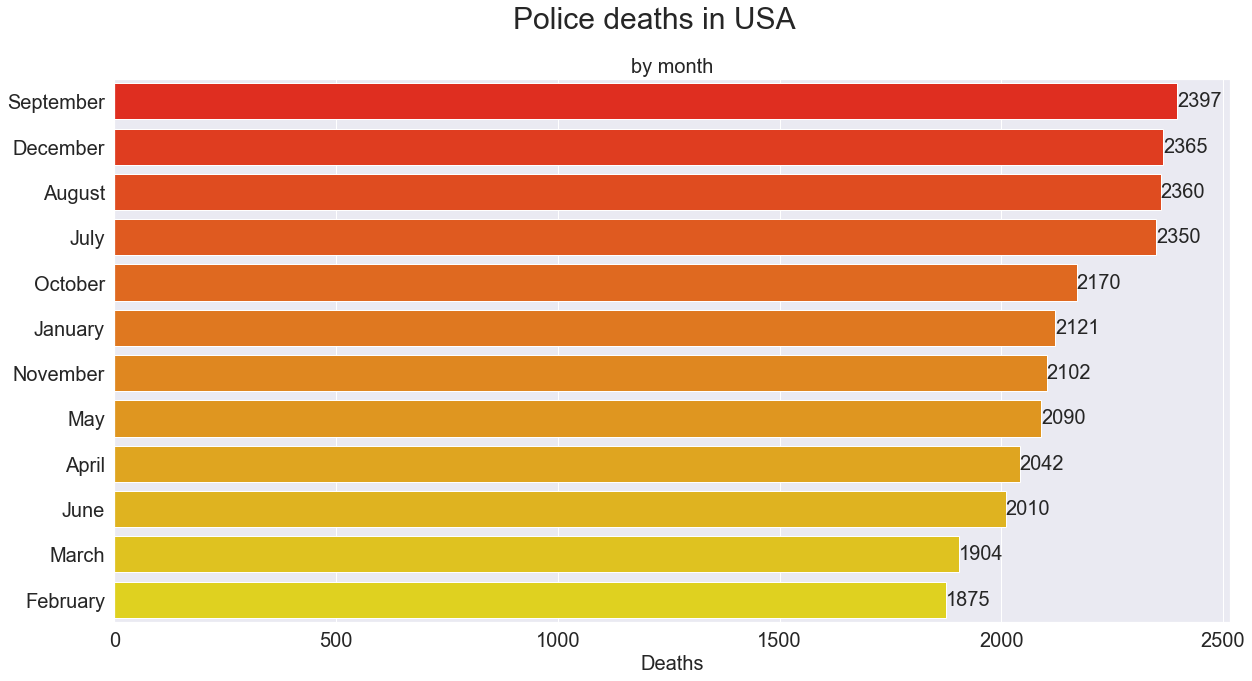

In [117]:
plt.figure(figsize=(20,10))

plot_2 = sns.barplot(data=sorted_deaths_month_wise,x=sorted_deaths_month_wise['Count'],
                     y=sorted_deaths_month_wise.index,palette="autumn")

plt.suptitle("Police deaths in USA",fontsize=30)
plt.title("by month",fontsize=20)

plt.xlabel("Deaths",fontsize=20)
plt.ylabel("",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plot_2.bar_label(plot_2.containers[0],fontsize=20)

plt.show()

In [118]:
l = ['Name','Cause_of_Death', 'Date', 'Year','Month','Department','State']
deaths_day_wise = human_police_deaths_df.groupby(by="Day").count().drop(l,axis=1)
deaths_day_wise = deaths_day_wise.rename(columns={'Rank':'Count'})
deaths_day_wise = deaths_day_wise.reindex(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
deaths_day_wise

,Count
Day,
Sunday,3778
Monday,3536
Tuesday,3537
Wednesday,3492
Thursday,3645
Friday,3779
Saturday,4019


In [121]:
sorted_deaths_day_wise = deaths_day_wise.sort_values(by="Count",ascending=False)
sorted_deaths_day_wise

,Count
Day,
Saturday,4019
Friday,3779
Sunday,3778
Thursday,3645
Tuesday,3537
Monday,3536
Wednesday,3492


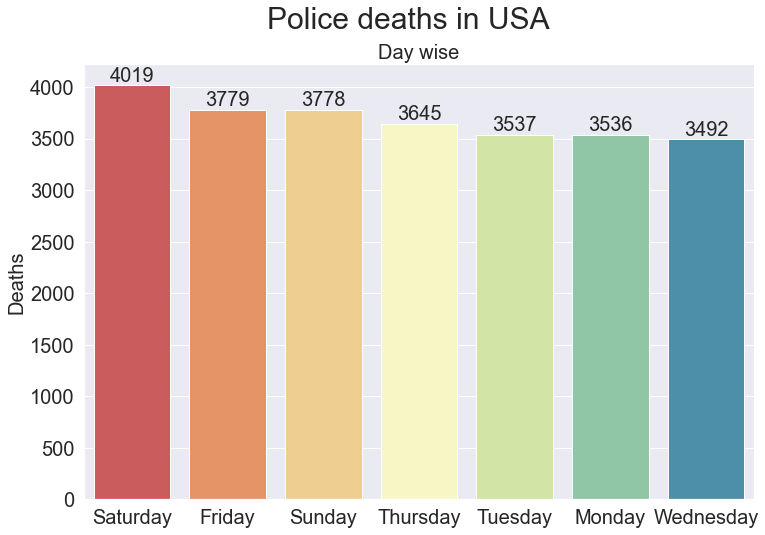

In [122]:
plt.figure(figsize=(12,8))

plot_3 = sns.barplot(data=sorted_deaths_day_wise,x=sorted_deaths_day_wise.index,
                     y=sorted_deaths_day_wise['Count'],palette="Spectral")

plt.suptitle("Police deaths in USA",fontsize=30)
plt.title("Day wise",fontsize=20)

plt.xlabel("",fontsize=20)
plt.ylabel("Deaths",fontsize=20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plot_3.bar_label(plot_3.containers[0],fontsize=20)

plt.show()

In [161]:
human_police_deaths_df["Rank"].unique()

array(['Constable', 'Sheriff', 'Deputy Sheriff', 'Marshal',
       'Superintendent', 'High Sheriff', 'Watchman', 'Night Watchman',
       'Boatman', 'Custom House Officer', 'Customs Inspector', 'Keeper',
       'Watch Officer', 'Town Sergeant', 'Guard', 'Private',
       'Second Lieutenant', 'Deputy U.S. Marshal', 'Captain',
       'First Sergeant', 'Town Marshal', 'Prison Guard', 'Warden',
       'Undersheriff', 'Lieutenant', 'Patrolman', 'Major',
       'Police Officer', 'Sergeant', 'Deputy Constable', 'Shadow',
       'Officer', 'Policeman', 'Indian Agent', 'City Marshal',
       'Deputy Warden', 'Deputized Civilian', 'Assistant City Marshal',
       'Special Patrolman', 'Special Police Officer', 'Jailer',
       'Patrol Officer', 'Deputy', 'Deputy City Marshal', 'Inspector',
       'Deputy Collector', 'Special Agent', 'Deputy Marshal',
       'Deputy Provost Marshal', 'Assistant Provost Marshal',
       'Chief of Police', 'Township Constable', 'Posseman',
       'Police Deputy', 'S

In [162]:
l = ['Cause_of_Death','Year','Month','Department','State','Day']

deaths_rank_wise = human_police_deaths_df.groupby(by="Rank").count().drop(l,axis=1)
deaths_rank_wise = deaths_rank_wise.rename(columns={'Name':'Count'})
deaths_rank_wise = deaths_rank_wise.sort_values(by="Count",ascending=False)

deaths_rank_wise.head(10)

,Count,Date
Rank,,
Patrolman,3876,3876
Police Officer,3549,3549
Deputy Sheriff,3224,3224
Officer,1746,1746
Sergeant,1423,1423
Detective,861,861
Trooper,857,857
Sheriff,775,775
Chief of Police,691,691


In [135]:
l = ['Cause_of_Death', 'Date','Year','Month','Name','State','Day']

deaths_dept_wise = human_police_deaths_df.groupby(by="Department").count().drop(l,axis=1)
deaths_dept_wise = deaths_dept_wise.rename(columns={'Rank':'Count'})
deaths_dept_wise = deaths_dept_wise.sort_values(by="Count",ascending=False)

deaths_dept_wise.head(10)

,Count
Department,
"New York City Police Department, NY",963
"Chicago Police Department, IL",515
"Puerto Rico Police Department, PR",358
"Philadelphia Police Department, PA",318
"United States Department of Justice - United States Marshals Service, US",306
"Detroit Police Department, MI",243
"California Highway Patrol, CA",231
"Los Angeles Police Department, CA",220
"St. Louis Metropolitan Police Department, MO",170


In [136]:
l = ['Cause_of_Death', 'Date', 'Year','Month','Name','Department','Day']

deaths_state_wise = human_police_deaths_df.groupby(by="State").count().drop(l,axis=1)
deaths_state_wise = deaths_state_wise.rename(columns={'Rank':'Count'})
deaths_state_wise = deaths_state_wise.sort_values(by="Count",ascending=False)

deaths_state_wise.head(10)

,Count
State,
Texas,2203
United States,1951
New York,1868
California,1730
Illinois,1158
Pennsylvania,1086
Kentucky,938
Florida,924
Ohio,888


In [127]:
#K9 Dataset 


In [137]:
k9_unit_df = police_deaths_df[police_deaths_df["K9_Unit"]==1].reset_index(drop=True)
k9_unit_df.drop("K9_Unit",axis=1,inplace=True)
k9_unit_df

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State
0,K9,Vag,Struck by streetcar,"Thursday, April 12, 1877",1877,April,Thursday,"Buffalo Police Department, NY",New York
1,K9,Danger,Struck by train,"Tuesday, June 9, 1896",1896,June,Tuesday,"New York, Chicago and St. Louis Railroad Polic...",United States
2,K9,Ollie,Struck by vehicle,"Thursday, August 26, 1909",1909,August,Thursday,"New York City Police Department, NY",New York
3,K9,Trooper,Assault,"Friday, March 17, 1961",1961,March,Friday,"Kansas City Police Department, MO",Missouri
4,K9,Baron,Assault,"Wednesday, September 12, 1962",1962,September,Wednesday,"Virginia State Police, VA",Virginia
...,...,...,...,...,...,...,...,...,...
478,K9,Ciro,Fire,"Thursday, March 3, 2022",2022,March,Thursday,"Humphreys County Sheriff's Office, TN",Tennessee
479,K9,Dash,Gunfire,"Wednesday, March 9, 2022",2022,March,Wednesday,"Shepherdsville Police Department, KY",Kentucky
480,K9,Major,Gunfire,"Sunday, April 10, 2022",2022,April,Sunday,"Franklin County Sheriff's Office, NC",North Carolina
481,K9,Jinx,Gunfire,"Monday, April 11, 2022",2022,April,Monday,"El Paso County Sheriff's Office, CO",Colorado


In [138]:
k9_unit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            483 non-null    object
 1   Name            483 non-null    object
 2   Cause_of_Death  483 non-null    object
 3   Date            483 non-null    object
 4   Year            483 non-null    int64 
 5   Month           483 non-null    object
 6   Day             483 non-null    object
 7   Department      483 non-null    object
 8   State           483 non-null    object
dtypes: int64(1), object(8)
memory usage: 34.1+ KB


In [139]:
l = ['Name','Cause_of_Death','Date','Month','Day','Department','State']

k9_death_count_by_year_df = k9_unit_df.groupby(by="Year").count().drop(l,axis=1)
k9_death_count_by_year_df = k9_death_count_by_year_df.rename(columns={'Rank':'Count'})

k9_death_count_by_year_df.head(10)


,Count
Year,
1877,1
1896,1
1909,1
1961,1
1962,1
1965,1
1966,2
1968,1
1969,1


In [140]:
k9_death_count_by_year_df.describe()

,Count
count,60.000000
mean,8.050000
std,8.310551
min,1.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,36.000000


In [141]:
k9_death_count_by_year_df.sort_values(by='Count',ascending=False).head(10)

,Count
Year,
2016,36
2019,28
2018,28
2015,27
2017,24
2020,22
2013,22
2021,21
2014,20


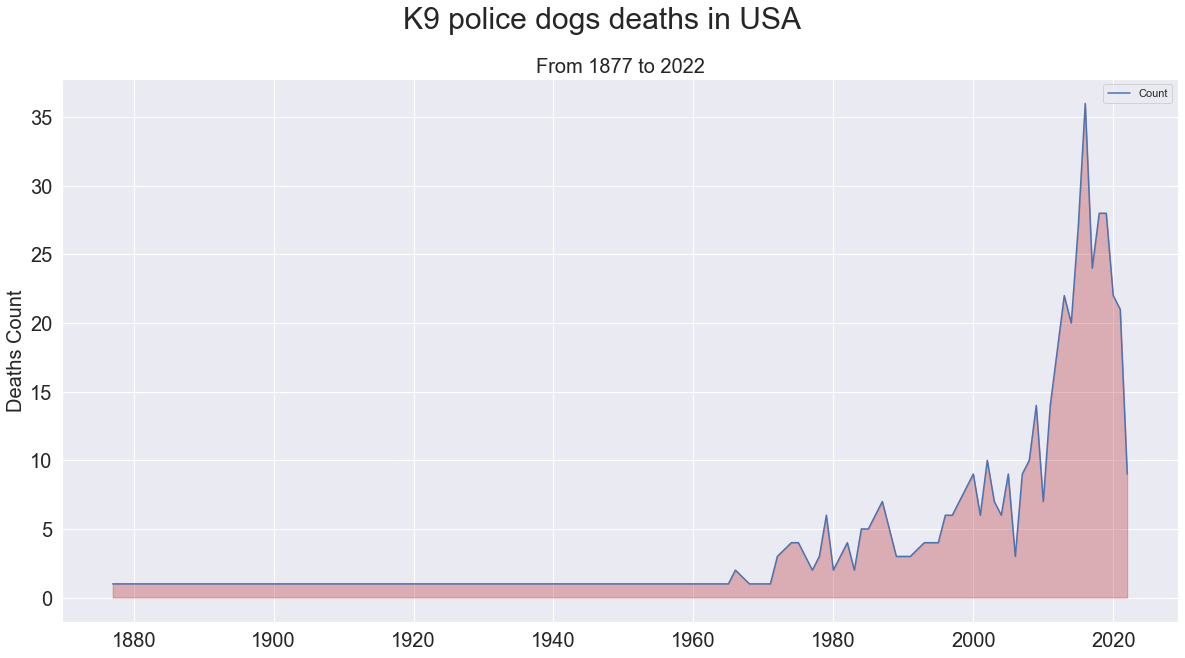

In [142]:
plt.figure(figsize=(20,10))

plot_4 = sns.lineplot(data=k9_death_count_by_year_df)

plt.suptitle("K9 police dogs deaths in USA",fontsize=30)
plt.title("From 1877 to 2022",fontsize=20)

plt.xlabel("",fontsize=20)
plt.ylabel("Deaths Count",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.fill_between(k9_death_count_by_year_df.index,k9_death_count_by_year_df["Count"], color='firebrick', alpha=.3)

plt.show()

In [143]:
l = ['Name','Date','Month',"Year",'Day','Department','State']

k9_overall_cause_of_death = k9_unit_df.groupby(by="Cause_of_Death").count().drop(l,axis=1)
k9_overall_cause_of_death = k9_overall_cause_of_death.rename(columns={'Rank':'Count'})
k9_overall_cause_of_death = k9_overall_cause_of_death.sort_values(by="Count",ascending=False)

k9_overall_cause_of_death

,Count
Cause_of_Death,
Gunfire,140
Heatstroke,81
Struck by vehicle,58
Automobile crash,27
Gunfire (Inadvertent),26
Fall,25
Stabbed,24
Duty related illness,19
Vehicular assault,13


In [144]:
k9_deaths_in_percent = []
for items in k9_overall_cause_of_death["Count"]:
    percent = round((items / k9_overall_cause_of_death["Count"].sum()) * 100,2)
    k9_deaths_in_percent.append(percent)
    
k9_overall_cause_of_death["Relative Frequency_%"] = k9_deaths_in_percent  
k9_overall_cause_of_death

,Count,Relative Frequency_%
Cause_of_Death,,
Gunfire,140,28.99
Heatstroke,81,16.77
Struck by vehicle,58,12.01
Automobile crash,27,5.59
Gunfire (Inadvertent),26,5.38
Fall,25,5.18
Stabbed,24,4.97
Duty related illness,19,3.93
Vehicular assault,13,2.69


In [145]:
k9_overall_cause_of_death.sort_values(by='Count',ascending=False).head(10)

,Count,Relative Frequency_%
Cause_of_Death,,
Gunfire,140,28.99
Heatstroke,81,16.77
Struck by vehicle,58,12.01
Automobile crash,27,5.59
Gunfire (Inadvertent),26,5.38
Fall,25,5.18
Stabbed,24,4.97
Duty related illness,19,3.93
Vehicular assault,13,2.69


In [146]:
l = ['Name','Cause_of_Death','Date','Year','Day','Department','State']

k9_deaths_month_wise = k9_unit_df.groupby(by="Month").count().drop(l,axis=1)
k9_deaths_month_wise = k9_deaths_month_wise.rename(columns={'Rank':'Count'})

k9_deaths_month_wise = k9_deaths_month_wise.reindex(["January","February","March","April","May",
                                                     "June","July","August","September","October","November","December"])

k9_deaths_month_wise

,Count
Month,
January,44
February,23
March,33
April,34
May,31
June,50
July,62
August,60
September,39


In [147]:
k9_sorted_deaths_month_wise = k9_deaths_month_wise.sort_values(by="Count",ascending=False)
k9_sorted_deaths_month_wise

,Count
Month,
July,62
August,60
June,50
January,44
October,40
September,39
November,37
April,34
March,33


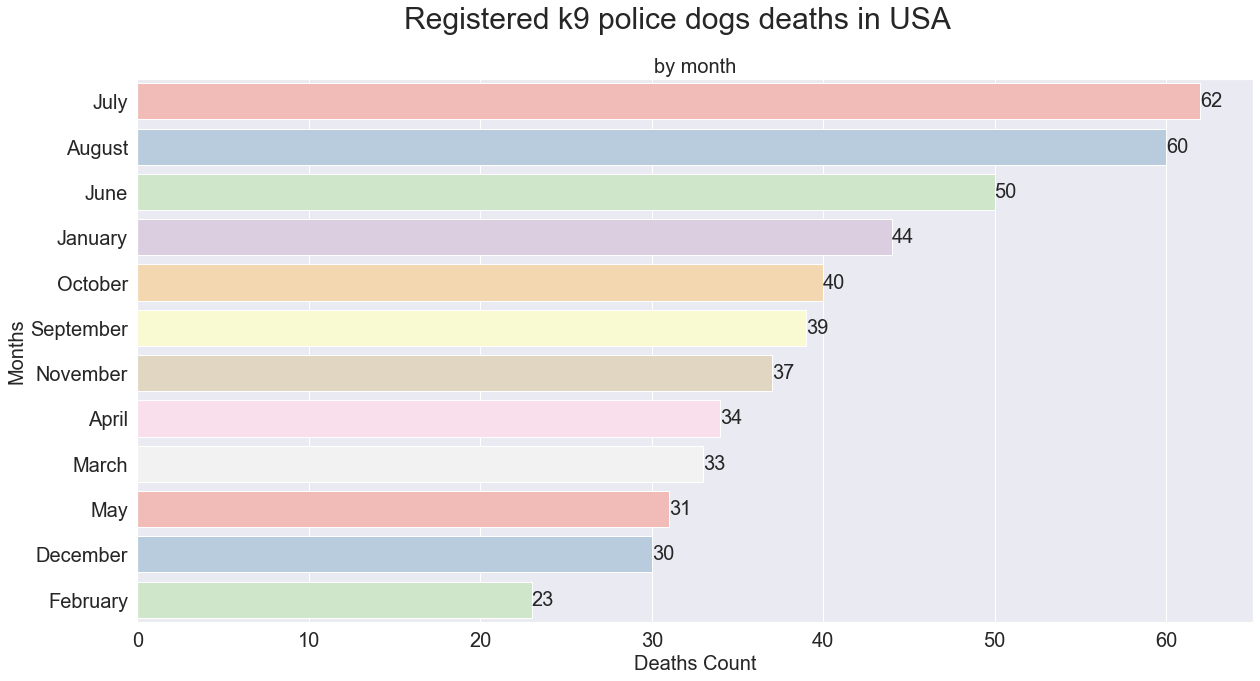

In [148]:
plt.figure(figsize=(20,10))

plot_5 = sns.barplot(data=k9_sorted_deaths_month_wise,x=k9_sorted_deaths_month_wise['Count'],
                     y=k9_sorted_deaths_month_wise.index,palette="Pastel1")

plt.suptitle("Registered k9 police dogs deaths in USA",fontsize=30)
plt.title("by month",fontsize=20)

plt.xlabel("Deaths Count",fontsize=20)
plt.ylabel("Months",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plot_5.bar_label(plot_5.containers[0],fontsize=20)

plt.show()

In [149]:
l = ['Name','Cause_of_Death','Date','Year','Month','Department','State']

k9_deaths_day_wise = k9_unit_df.groupby(by="Day").count().drop(l,axis=1)
k9_deaths_day_wise = k9_deaths_day_wise.rename(columns={'Rank':'Count'})

k9_deaths_day_wise = k9_deaths_day_wise.reindex(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

k9_deaths_day_wise

,Count
Day,
Sunday,54
Monday,70
Tuesday,76
Wednesday,84
Thursday,80
Friday,68
Saturday,51


In [150]:
k9_sorted_deaths_day_wise = k9_deaths_day_wise.sort_values(by="Count",ascending=False)
k9_sorted_deaths_day_wise

,Count
Day,
Wednesday,84
Thursday,80
Tuesday,76
Monday,70
Friday,68
Sunday,54
Saturday,51


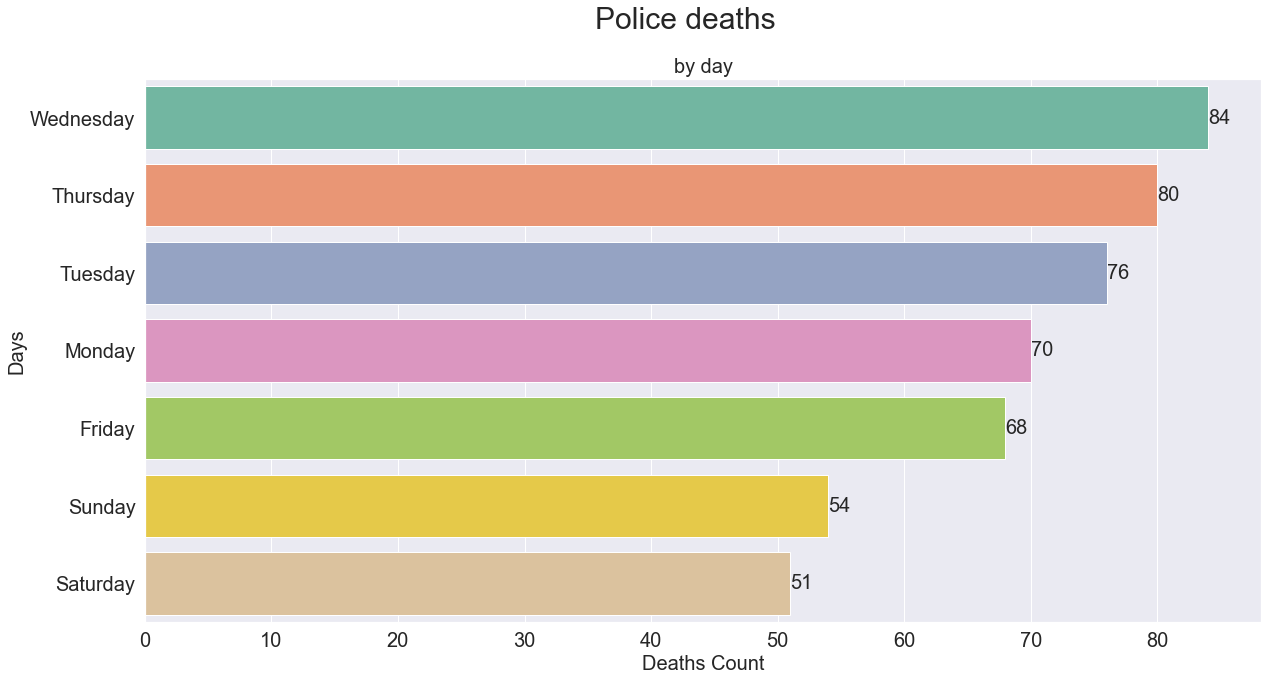

In [151]:
plt.figure(figsize=(20,10))

plot_6 = sns.barplot(data=k9_sorted_deaths_day_wise,x=k9_sorted_deaths_day_wise['Count'],y=k9_sorted_deaths_day_wise.index,palette="Set2")

plt.suptitle("Police deaths",fontsize=30)
plt.title("by day",fontsize=20)

plt.xlabel("Deaths Count",fontsize=20)
plt.ylabel("Days",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plot_6.bar_label(plot_6.containers[0],fontsize=20)

plt.show()

In [152]:
l = ['Cause_of_Death','Date','Year','Month','Name','State','Day']

k9_deaths_dept_wise = k9_unit_df.groupby(by="Department").count().drop(l,axis=1)
k9_deaths_dept_wise = k9_deaths_dept_wise.rename(columns={'Rank':'Count'})

k9_deaths_dept_wise = k9_deaths_dept_wise.sort_values(by="Count",ascending=False)

k9_deaths_dept_wise.head(10)

,Count
Department,
"Chicago Police Department, IL",8
"Phoenix Police Department, AZ",7
"United States Department of Homeland Security - Customs and Border Protection - United States Border Patrol, US",6
"Norfolk Police Department, VA",5
"Michigan State Police, MI",4
"Pittsburgh Bureau of Police, PA",4
"Tacoma Police Department, WA",4
"Bexar County Sheriff's Office, TX",4
"Sacramento County Sheriff's Department, CA",4


In [153]:
l = ['Cause_of_Death','Date','Year','Month','Name','Department','Day']

k9_deaths_state_wise = k9_unit_df.groupby(by="State").count().drop(l,axis=1)
k9_deaths_state_wise = k9_deaths_state_wise.rename(columns={'Rank':'Count'})

k9_deaths_state_wise = k9_deaths_state_wise.sort_values(by="Count",ascending=False)

k9_deaths_state_wise.head(10)

,Count
State,
Florida,52
California,51
Arizona,31
Texas,26
Virginia,23
Indiana,21
United States,19
Pennsylvania,19
Illinois,16


In [154]:
df = k9_overall_cause_of_death.sort_values(by='Count',ascending=False).head(10)
df

,Count,Relative Frequency_%
Cause_of_Death,,
Gunfire,140,28.99
Heatstroke,81,16.77
Struck by vehicle,58,12.01
Automobile crash,27,5.59
Gunfire (Inadvertent),26,5.38
Fall,25,5.18
Stabbed,24,4.97
Duty related illness,19,3.93
Vehicular assault,13,2.69


In [155]:
data = df.reset_index()

In [156]:
data

,Cause_of_Death,Count,Relative Frequency_%
0,Gunfire,140,28.99
1,Heatstroke,81,16.77
2,Struck by vehicle,58,12.01
3,Automobile crash,27,5.59
4,Gunfire (Inadvertent),26,5.38
5,Fall,25,5.18
6,Stabbed,24,4.97
7,Duty related illness,19,3.93
8,Vehicular assault,13,2.69
9,Assault,11,2.28
